Business Challenge: EDA and SQL


In [6]:
# import pymysql
from sqlalchemy.orm import sessionmaker
from sqlalchemy import create_engine



# Switch to SQLAlchemy, because of UserWarning: 

# Database connection settings
host = "localhost"  # host, e.g., 127.0.0.1 or a server address
user = "root"  #  MySQL username
password = "Malcomx1"  #  MySQL password
database = "WHO_health_data"  #  database name

# # Establish the connection
# connection = pymysql.connect(
#     host=host,
#     user=user,
#     password=password,
#     database=database
# )

# creates a SQLAlchemy engine, which serves as the entry point for interacting with the database
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}/{database}")
Session = sessionmaker(bind=engine)
session = Session()

print(f"Connected to the {database} database successfully!")


Connected to the WHO_health_data database successfully!


In [8]:
from sqlalchemy import Column, Integer, String, Float, Text, ForeignKey
from sqlalchemy.ext.declarative import declarative_base

Base = declarative_base()

class Indicator(Base):
    __tablename__ = 'indicators'
    indicator_id = Column(String(50), primary_key=True)
    indicator_name = Column(Text, nullable=False)
    description = Column(Text)
    source = Column(Text)

class Data(Base):
    __tablename__ = 'data'
    data_id = Column(Integer, primary_key=True, autoincrement=True)
    indicator_id = Column(String(50), ForeignKey('indicators.indicator_id'))
    year = Column(Integer)
    value = Column(Float)
    spatial_dimension = Column(String(50))
    dimension_code = Column(String(50))

class Dimension(Base):
    __tablename__ = 'dimensions'
    dimension_code = Column(String(50), primary_key=True)
    dimension_name = Column(Text, nullable=False)
    description = Column(Text)

class Country(Base):
    __tablename__ = 'countries'
    code = Column(String(50), primary_key=True)
    title = Column(Text, nullable=False)
    region = Column(Text)
    parent_code = Column(String(50))


In [9]:
Base.metadata.create_all(engine)


In [12]:
import pandas as pd

# Load the data

hygiene_data = pd.read_csv(r'world_health_statistics\data\WSH_HYGIENE_BASIC.csv')
country_data = pd.read_csv(r'world_health_statistics\codes\COUNTRY.csv')

# Check for NaN values
print(country_data.isnull().sum())  # This will show which columns contain NaN values

# Replace NaN with default values or drop rows with NaN
# Option 1: Replace NaN with default strings (e.g., "Unknown")
country_data.fillna("Unknown", inplace=True)

# Option 2: Drop rows with NaN values (only if it makes sense to drop them)
# country_data.dropna(inplace=True)


Dimension          0
Code               0
Title              0
ParentDimension    5
ParentCode         5
ParentTitle        5
dtype: int64


In [15]:
# Close the session
session.close()
# Restart the session
session = Session()


In [16]:
from sqlalchemy.exc import IntegrityError

for _, row in country_data.iterrows():
    country = Country(
        code=row['Code'],
        title=row['Title'],
        region=row['ParentTitle'],
        parent_code=row['ParentCode']
    )
    session.add(country)

try:
    session.commit()
except IntegrityError as e:
    session.rollback()
    print(f"Error: {e}")


In [10]:
from sqlalchemy.exc import IntegrityError

for _, row in country_data.iterrows():
    country = Country(
        code=row['Code'],
        title=row['Title'],
        region=row['ParentTitle'],
        parent_code=row['ParentCode']
    )
    session.add(country)

try:
    session.commit()
except IntegrityError:
    session.rollback()
    print("Duplicate entries skipped.")


ProgrammingError: (pymysql.err.ProgrammingError) nan can not be used with MySQL
[SQL: INSERT INTO countries (code, title, region, parent_code) VALUES (%(code)s, %(title)s, %(region)s, %(parent_code)s)]
[parameters: ({'code': 'ABW', 'title': 'Aruba', 'region': 'Americas', 'parent_code': 'AMR'}, {'code': 'AFG', 'title': 'Afghanistan', 'region': 'Eastern Mediterranean', 'parent_code': 'EMR'}, {'code': 'AGO', 'title': 'Angola', 'region': 'Africa', 'parent_code': 'AFR'}, {'code': 'AIA', 'title': 'Anguilla', 'region': 'Americas', 'parent_code': 'AMR'}, {'code': 'ALB', 'title': 'Albania', 'region': 'Europe', 'parent_code': 'EUR'}, {'code': 'AND', 'title': 'Andorra', 'region': 'Europe', 'parent_code': 'EUR'}, {'code': 'ARE', 'title': 'United Arab Emirates', 'region': 'Eastern Mediterranean', 'parent_code': 'EMR'}, {'code': 'ARG', 'title': 'Argentina', 'region': 'Americas', 'parent_code': 'AMR'}  ... displaying 10 of 233 total bound parameter sets ...  {'code': 'ZMB', 'title': 'Zambia', 'region': 'Africa', 'parent_code': 'AFR'}, {'code': 'ZWE', 'title': 'Zimbabwe', 'region': 'Africa', 'parent_code': 'AFR'})]
(Background on this error at: https://sqlalche.me/e/14/f405)

In [81]:
# Switch to SQLAlchemy, because of UserWarning: 

import pandas as pd

query = """
SELECT *
FROM HealthStatistics
WHERE RAND() <= 0.2;
"""

df_healtstatistics_sample = pd.read_sql(query, engine)

print(df_healtstatistics_sample)


          id       Country  Year          DiseaseName DiseaseCategory  \
0          3        Turkey  2015             COVID-19         Genetic   
1         11        Canada  2011              Leprosy  Cardiovascular   
2         23  South Africa  2014              Malaria       Bacterial   
3         38        Turkey  2006              Malaria  Cardiovascular   
4         43     Indonesia  2000               Rabies       Bacterial   
...      ...           ...   ...                  ...             ...   
19986  99980     Australia  2017         Hypertension    Neurological   
19987  99984            UK  2010              Measles       Metabolic   
19988  99985        Canada  2001  Alzheimer's Disease       Bacterial   
19989  99986   South Korea  2004              Measles     Respiratory   
19990  99987        Russia  2005               Asthma         Chronic   

       PrevalenceRate  IncidenceRate  MortalityRate AgeGroup  Gender  ...  \
0                0.91           2.35          

In [ ]:
# Switch to SQLAlchemy, because of UserWarning: 

# Trying a filter for Malaria in 2020
query = """
SELECT *
FROM HealthStatistics
WHERE Year = 2020 AND DiseaseName = 'Malaria';
"""
df_filtered = pd.read_sql(query, engine)

print(df_filtered)


        id       Country  Year DiseaseName DiseaseCategory  PrevalenceRate  \
0      105     Australia  2020     Malaria         Genetic           12.89   
1      486       Nigeria  2020     Malaria       Bacterial           18.91   
2     1200         China  2020     Malaria    Neurological            7.81   
3     1325     Argentina  2020     Malaria      Autoimmune            2.21   
4     1544     Australia  2020     Malaria       Metabolic            1.60   
..     ...           ...   ...         ...             ...             ...   
196  99253  South Africa  2020     Malaria     Respiratory            9.22   
197  99350        Turkey  2020     Malaria       Bacterial            7.57   
198  99402         India  2020     Malaria       Metabolic           13.16   
199  99406        Mexico  2020     Malaria         Genetic            1.28   
200  99475     Indonesia  2020     Malaria       Metabolic           15.20   

     IncidenceRate  MortalityRate AgeGroup  Gender  ...  Hospit

Data retrieved successfully!

Top Infectious Diseases by Prevalence:
                     Avg_Prevalence  Total_Prevalence
DiseaseName                                          
Polio                     11.092771            920.70
Influenza                 10.972241           1272.78
Ebola                     10.409245           1103.38
Malaria                   10.408333           1124.10
Asthma                    10.332857           1012.62
Measles                   10.321685            918.63
HIV/AIDS                  10.213814            990.74
Dengue                    10.173448            885.09
Alzheimer's Disease       10.101000            909.09
Parkinson's Disease       10.025934            912.36

Change in Prevalence Rates Over the Last 5 Years:
                     Initial_Prevalence  Latest_Prevalence  \
DiseaseName                                                  
Cholera                            7.85              17.66   
Parkinson's Disease               12.31       

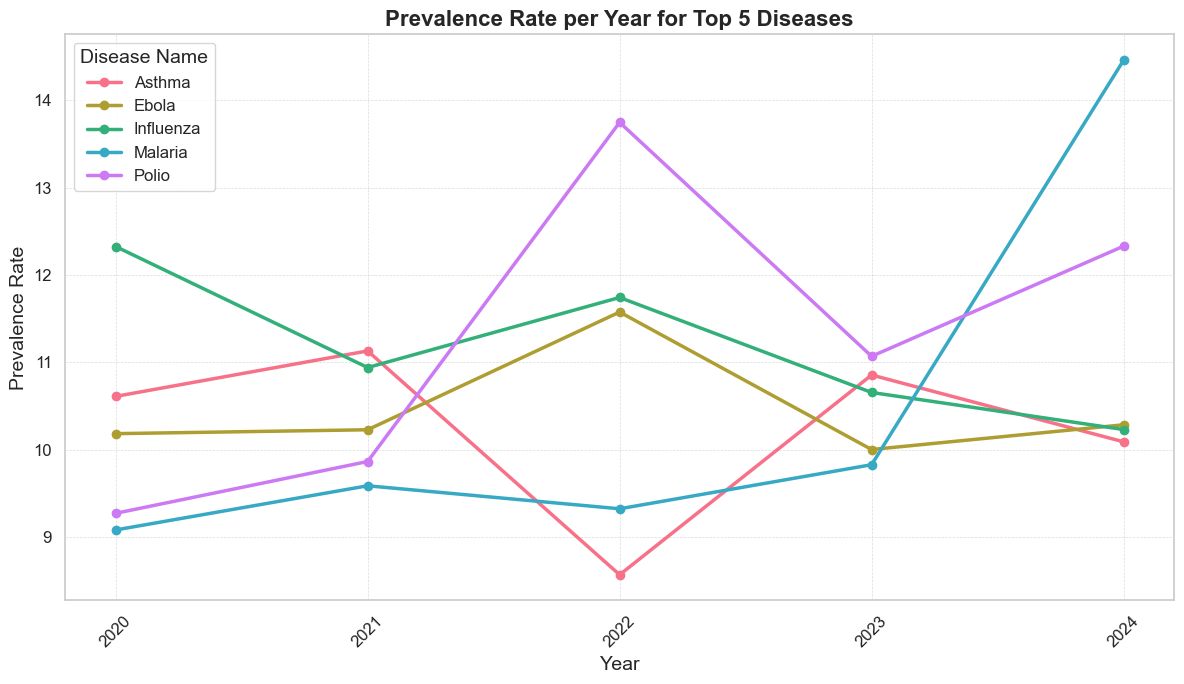

In [83]:
# Question 1:
# Which infectious diseases have the highest prevalence rates globally, and how have these rates changed over the past 5 years?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# SQL query to fetch data
query = """
SELECT
    DiseaseName,
    DiseaseCategory,
    Year,
    PrevalenceRate
FROM HealthStatistics
WHERE
    DiseaseCategory = 'Infectious'
    AND Year BETWEEN 2020 AND 2024
ORDER BY
    Year DESC;
"""

# Execute the query and load the data into a pandas DataFrame
df_question1 = pd.read_sql(query, engine)

# Analyze the data
# Step 1: Group data to find the highest average prevalence rates globally
highest_prevalence = (
    df_question1.groupby("DiseaseName")
    .agg(
        Avg_Prevalence=("PrevalenceRate", "mean"),
        Total_Prevalence=("PrevalenceRate", "sum")
    )
    .sort_values(by="Avg_Prevalence", ascending=False)
)

# Step 2: Analyze the change in prevalence rates over the last 5 years
recent_years = df_question1[df_question1['Year'] >= df_question1['Year'].max() - 5]

prevalence_change = (
    recent_years.groupby("DiseaseName")
    .agg(
        Initial_Prevalence=("PrevalenceRate", lambda x: x.iloc[0]),
        Latest_Prevalence=("PrevalenceRate", lambda x: x.iloc[-1])
    )
    .assign(Change_in_Prevalence=lambda x: x["Latest_Prevalence"] - x["Initial_Prevalence"])
    .sort_values(by="Change_in_Prevalence", ascending=False)
)

# Step 3: Merge both results
result = highest_prevalence.merge(prevalence_change, on="DiseaseName", how="inner")

# Display results
print("\nTop Infectious Diseases by Prevalence:")
print(highest_prevalence.head(10))

print("\nChange in Prevalence Rates Over the Last 5 Years:")
print(prevalence_change.head(10))

# Step 4: Sort data by year
df_question1_sorted = df_question1.sort_values(by='Year')

# Step 5: Select top 5 diseases by highest average prevalence rates
top_diseases = highest_prevalence.head(5).index

# Filter data for the top 5 diseases
top_diseases_data = df_question1_sorted[df_question1_sorted['DiseaseName'].isin(top_diseases)]

# Aggregate data by DiseaseName and Year
aggregated_data = (
    top_diseases_data.groupby(['DiseaseName', 'Year'])
    .agg({'PrevalenceRate': 'mean'})
    .reset_index()
)

# Plot the aggregated data
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
palette = sns.color_palette("husl", len(top_diseases))  # colorful theme

for i, (disease, group) in enumerate(aggregated_data.groupby('DiseaseName')):
    plt.plot(group['Year'], group['PrevalenceRate'], 
             marker='o', label=disease, color=palette[i], linewidth=2.5)

# Add labels and title
plt.title('Prevalence Rate per Year for Top 5 Diseases', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Prevalence Rate', fontsize=14)
plt.xticks(sorted(aggregated_data['Year'].unique()), fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(title="Disease Name", fontsize=12, title_fontsize=14)
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\dbigman\AppData\Local\Temp\ipykernel_13188\1944517882.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, connection, params=params)
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users

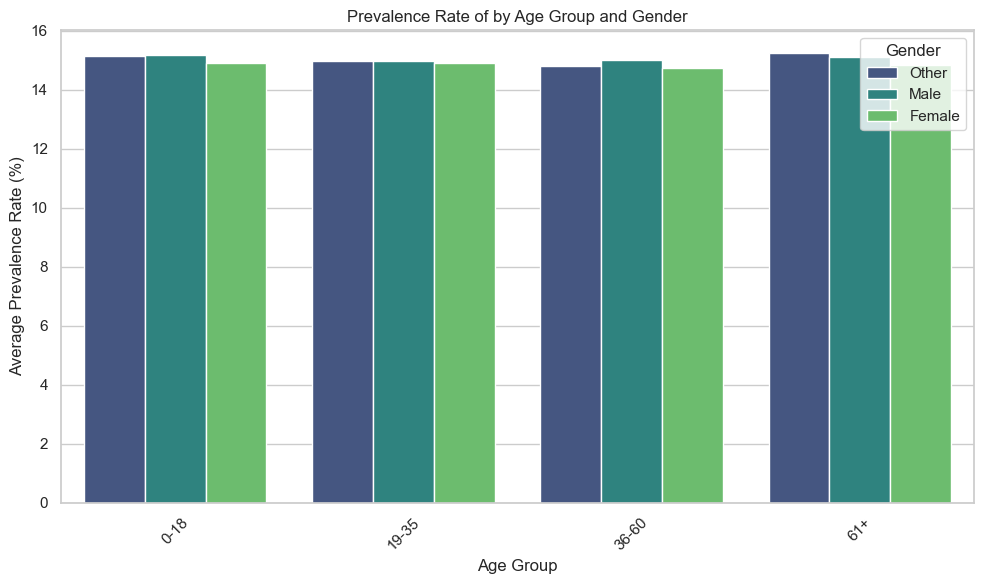

In [30]:
# Question 2:
# Which age groups and genders are most affected by high-prevalence infectious diseases? 
# Are there significant disparities?

def get_high_prevalence_data(connection: pymysql.connections.Connection, diseasecategory: str) -> pd.DataFrame:
    """    
    This function queries the `HealthStatistics` table to compute the average prevalence rate and 
    the total affected population for each combination of age group and gender within the specified 
    disease category. It filters the data to include only those entries where the prevalence rate 
    is greater than the average prevalence rate.

    Args:
        connection (pymysql.connections.Connection): A valid database connection created with PyMySQL.
        diseasecategory (str): The disease category to filter on (e.g., 'Infectious').

    Returns:
        pd.DataFrame: A pandas DataFrame containing columns:
                      - `AgeGroup`: The age group.
                      - `Gender`: The gender (Male, Female, Other).
                      - `AvgPrevalence`: The average prevalence rate for the group.
                      - `TotalAffected`: The total population affected for the group.
    """
        
    
    query = """
    SELECT
        AgeGroup,
        Gender,
        AVG(PrevalenceRate) AS AvgPrevalence,
        SUM(PopulationAffected) AS TotalAffected
    FROM HealthStatistics
    WHERE
        DiseaseCategory = %s
        AND PrevalenceRate > (
            SELECT AVG(PrevalenceRate)
            FROM HealthStatistics
            WHERE DiseaseCategory = %s
        )
    GROUP BY AgeGroup, Gender
    ORDER BY AvgPrevalence DESC;
    """
    params = (diseasecategory, diseasecategory)
    return pd.read_sql(query, connection, params=params)

# Call the function
df_question2 = get_high_prevalence_data(connection, 'Infectious')

# df_question2 = pd.read_sql(query_2, connection)

age_order = ['0-18', '19-35', '36-60', '61+']

df_question2['AgeGroup'] = pd.Categorical(df_question2['AgeGroup'], categories=age_order, ordered=True)

# Plot the graph with the updated order
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_question2,
    x="AgeGroup",
    y="AvgPrevalence",
    hue="Gender",
    palette="viridis"
)
plt.title("Prevalence Rate of by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Average Prevalence Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\dbigman\AppData\Local\Temp\ipykernel_13188\1639260823.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_question3 = pd.read_sql(query_3, connection)


           DiseaseName  AvgHealthcareAccess  AvgDoctorsPer1000  \
0              Malaria            74.786759           2.732954   
1                Ebola            74.704818           2.778387   
2             COVID-19            74.702642           2.706471   
3  Parkinson's Disease            74.792696           2.742936   
4         Tuberculosis            74.985969           2.764276   

   AvgRecoveryRate  
0        74.801839  
1        74.398003  
2        74.255789  
3        74.335690  
4        74.538776  
                     AvgHealthcareAccess  AvgDoctorsPer1000  AvgRecoveryRate
AvgHealthcareAccess             1.000000          -0.087803         0.336193
AvgDoctorsPer1000              -0.087803           1.000000        -0.058986
AvgRecoveryRate                 0.336193          -0.058986         1.000000


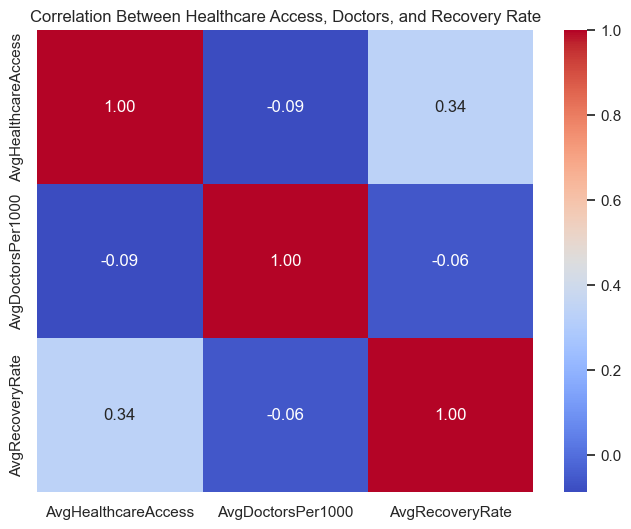

c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype

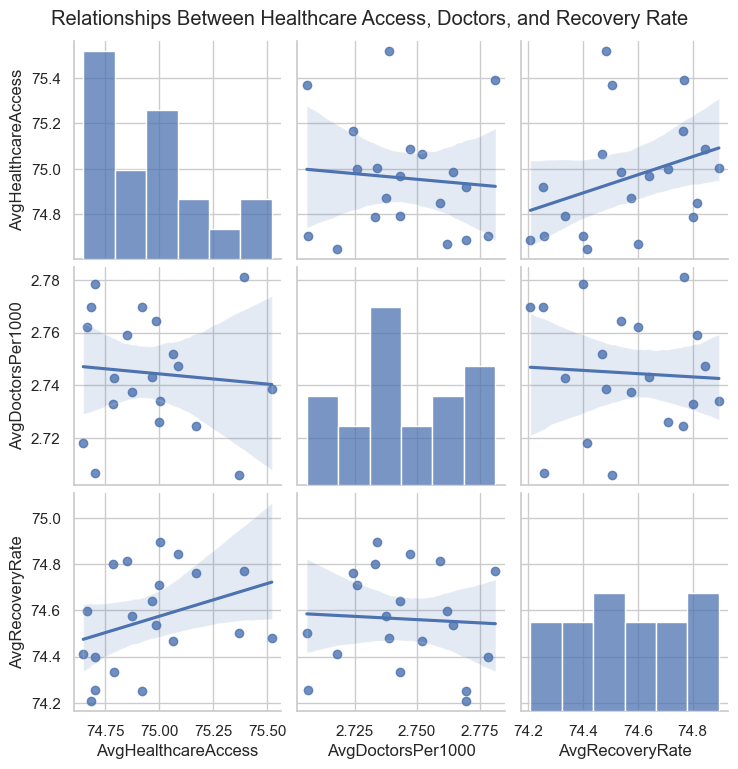

In [34]:
# Question 3: 
# Is there a correlation between healthcare access, the number of doctors per 1000 people, 
# and the recovery rate for specific diseases?

query_3 = """
SELECT
    DiseaseName,
    AVG(HealthcareAccess) AS AvgHealthcareAccess,
    AVG(DoctorsPer1000) AS AvgDoctorsPer1000,
    AVG(RecoveryRate) AS AvgRecoveryRate
FROM HealthStatistics
GROUP BY DiseaseName;
"""

df_question3 = pd.read_sql(query_3, connection)
print(df_question3.head())

correlation_matrix = df_question3[[
    'AvgHealthcareAccess',
    'AvgDoctorsPer1000',
    'AvgRecoveryRate'
]].corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Healthcare Access, Doctors, and Recovery Rate")
plt.show()


sns.pairplot(
    df_question3,
    vars=['AvgHealthcareAccess', 'AvgDoctorsPer1000', 'AvgRecoveryRate'],
    kind="reg"
)
plt.suptitle("Relationships Between Healthcare Access, Doctors, and Recovery Rate", y=1.02)
plt.show()



C:\Users\dbigman\AppData\Local\Temp\ipykernel_13188\3706241603.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_question4 = pd.read_sql(query_4, connection)


    DiseaseName  AvgMortalityRate  AvgPerCapitaIncome  AvgEducationIndex
0       Malaria          5.148557        51036.541119           0.656155
1     Hepatitis          5.111002        50134.584410           0.648586
2        Rabies          5.087610        50758.945881           0.648486
3  Tuberculosis          5.085437        49793.941319           0.650789
4       Measles          5.082200        50287.037513           0.649193
                    AvgMortalityRate  AvgPerCapitaIncome  AvgEducationIndex
AvgMortalityRate            1.000000            0.119010           0.742968
AvgPerCapitaIncome          0.119010            1.000000           0.346141
AvgEducationIndex           0.742968            0.346141           1.000000


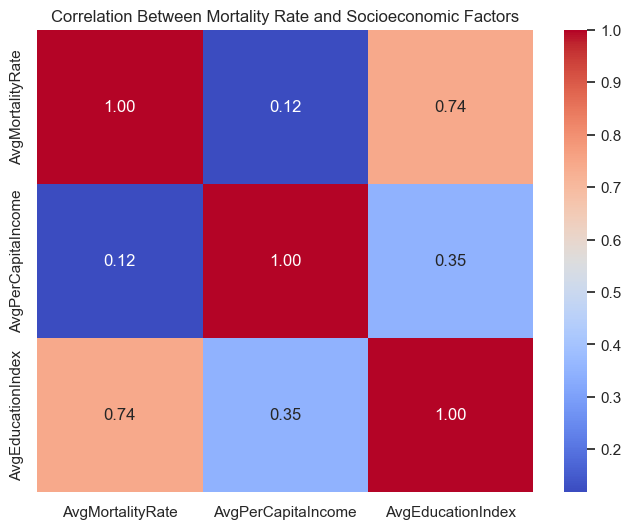

In [53]:
# Question 4: 
# Which infectious diseases have the highest mortality rates, and how do socioeconomic factors 
# (e.g., per capita income, education index) influence these rates?

query_4 = """
SELECT
    DiseaseName,
    AVG(MortalityRate) AS AvgMortalityRate,
    AVG(PerCapitaIncome) AS AvgPerCapitaIncome,
    AVG(EducationIndex) AS AvgEducationIndex
FROM HealthStatistics
GROUP BY DiseaseName
ORDER BY AvgMortalityRate DESC
LIMIT 10;
"""

df_question4 = pd.read_sql(query_4, connection)
# df_question4.describe()
print(df_question4.head())


# Calculate correlations
correlation_matrix = df_question4[[
    'AvgMortalityRate', 
    'AvgPerCapitaIncome', 
    'AvgEducationIndex'
]].corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Mortality Rate and Socioeconomic Factors")
plt.show()

C:\Users\dbigman\AppData\Local\Temp\ipykernel_13188\1616853608.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_urbanization = pd.read_sql(query, connection)


                     AvgUrbanizationRate  AvgIncidenceRate  AvgPrevalenceRate
AvgUrbanizationRate             1.000000          0.344218           0.162751
AvgIncidenceRate                0.344218          1.000000          -0.181572
AvgPrevalenceRate               0.162751         -0.181572           1.000000


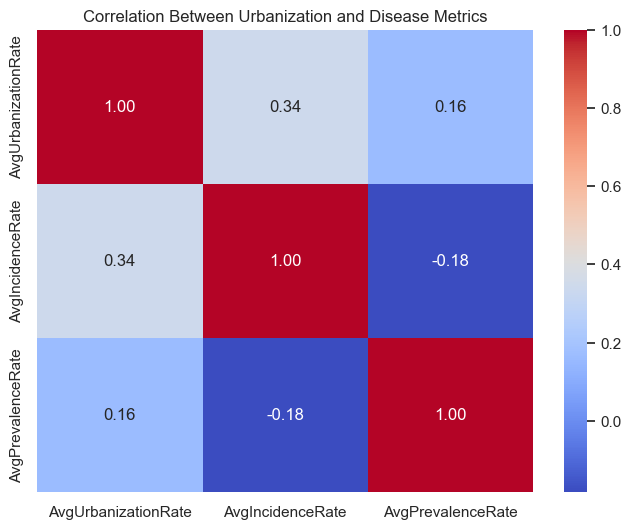

In [62]:
# Question 5:
# Does the urbanization rate affect the incidence and prevalence rates of infectious diseases? 
# Are urban areas more vulnerable to certain outbreaks?

query = """
SELECT
    DiseaseName,
    AVG(UrbanizationRate) AS AvgUrbanizationRate,
    AVG(IncidenceRate) AS AvgIncidenceRate,
    AVG(PrevalenceRate) AS AvgPrevalenceRate
FROM HealthStatistics
WHERE DiseaseCategory = 'Infectious'
GROUP BY DiseaseName
ORDER BY AvgUrbanizationRate DESC;
"""

# Execute the query and load the data into a pandas DataFrame
df_urbanization = pd.read_sql(query, connection)

df_urbanization.describe()
# Calculate correlation
correlation_matrix = df_urbanization[[
    'AvgUrbanizationRate',
    'AvgIncidenceRate',
    'AvgPrevalenceRate'
]].corr()

print(correlation_matrix)

# Visualize correlation as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Urbanization and Disease Metrics")
plt.show()



C:\Users\dbigman\AppData\Local\Temp\ipykernel_13188\990198507.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_vaccine = pd.read_sql(query, connection)
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureW

           DiseaseName AvailabilityOfVaccinesTreatment  AvgMortalityRate  \
0  Alzheimer's Disease                             Yes          5.440184   
1             HIV/AIDS                             Yes          5.401092   
2            Influenza                             Yes          5.390083   
3              Malaria                              No          5.360365   
4               Rabies                              No          5.339690   

   AvgRecoveryRate  
0        75.933502  
1        74.485672  
2        73.891701  
3        73.713059  
4        74.395177  
  AvailabilityOfVaccinesTreatment  AvgMortalityRate  AvgRecoveryRate
0                              No          5.023736        74.244544
1                             Yes          5.105629        74.391719


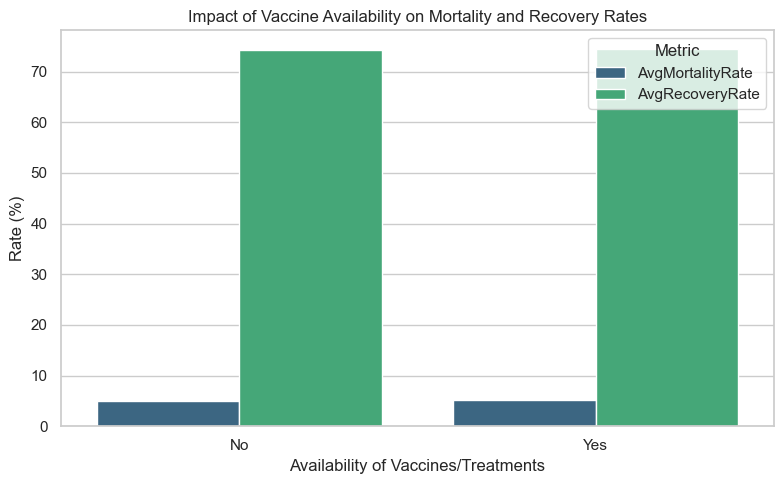

In [59]:
query = """
SELECT
    DiseaseName,
    AvailabilityOfVaccinesTreatment,
    AVG(MortalityRate) AS AvgMortalityRate,
    AVG(RecoveryRate) AS AvgRecoveryRate
FROM HealthStatistics
WHERE DiseaseCategory = 'Infectious'
GROUP BY DiseaseName, AvailabilityOfVaccinesTreatment
ORDER BY AvgMortalityRate DESC;
"""

df_vaccine = pd.read_sql(query, connection)
print(df_vaccine.head())

df_summary = df_vaccine.groupby("AvailabilityOfVaccinesTreatment").agg({
    "AvgMortalityRate": "mean",
    "AvgRecoveryRate": "mean"
}).reset_index()

print(df_summary)


import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for Mortality and Recovery Rates by Vaccine Availability
df_melted = df_summary.melt(id_vars="AvailabilityOfVaccinesTreatment", 
                            value_vars=["AvgMortalityRate", "AvgRecoveryRate"],
                            var_name="Metric", 
                            value_name="Rate")

plt.figure(figsize=(8, 5))
sns.barplot(data=df_melted, x="AvailabilityOfVaccinesTreatment", y="Rate", hue="Metric", palette="viridis")
plt.title("Impact of Vaccine Availability on Mortality and Recovery Rates")
plt.xlabel("Availability of Vaccines/Treatments")
plt.ylabel("Rate (%)")
plt.tight_layout()
plt.show()



C:\Users\dbigman\AppData\Local\Temp\ipykernel_13188\547848016.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_dalys = pd.read_sql(query, connection)
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWar

           DiseaseName  TotalDALYs
0               Asthma  12889410.0
1            Influenza  12885168.0
2              Leprosy  12881995.0
3                Ebola  12795525.0
4             Diabetes  12793286.0
5             COVID-19  12609290.0
6             HIV/AIDS  12599253.0
7              Cholera  12580108.0
8  Alzheimer's Disease  12543637.0
9                 Zika  12521254.0


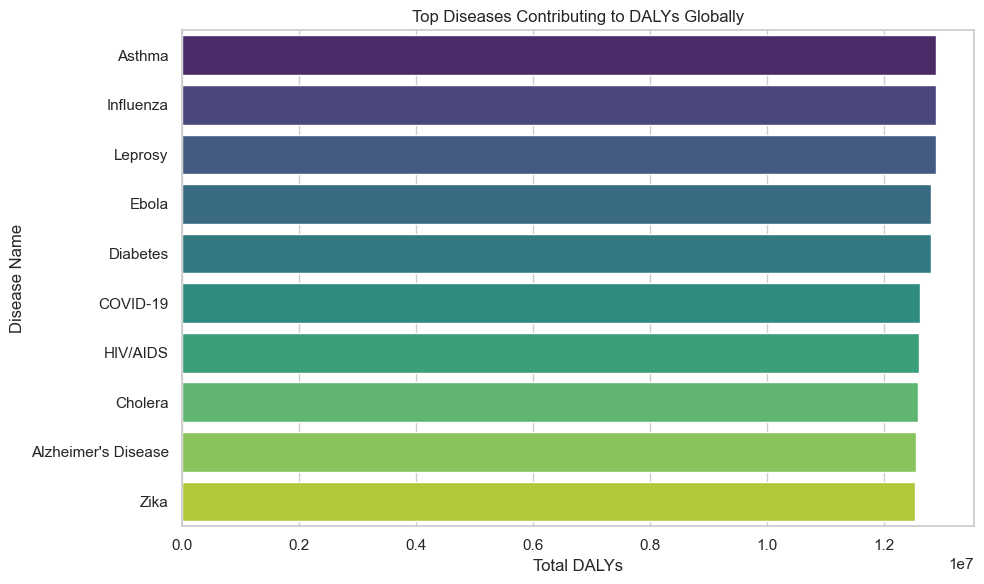

In [61]:
query = """
SELECT
    DiseaseName,
    SUM(DALYs) AS TotalDALYs
FROM HealthStatistics
GROUP BY DiseaseName
ORDER BY TotalDALYs DESC
LIMIT 10;
"""

# Execute the query and load the data into a DataFrame
df_dalys = pd.read_sql(query, connection)

# Display the top diseases contributing to DALYs
print(df_dalys)


# Bar plot for top diseases by DALYs
plt.figure(figsize=(10, 6))
sns.barplot(data=df_dalys, x="TotalDALYs", y="DiseaseName", palette="viridis")
plt.title("Top Diseases Contributing to DALYs Globally")
plt.xlabel("Total DALYs")
plt.ylabel("Disease Name")
plt.tight_layout()
plt.show()
